In [ ]:
#✅ Step 1 — Import all required libraries

import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
#✅ Step 2 — Load the dataset (sales_data_sample.csv)

df = pd.read_csv("sales_data_sample.csv", encoding ='latin1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
#✅ Step 3 — Select only numeric columns for clustering

X = df.select_dtypes(include=['float64', 'int64']).dropna()
X.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
0,10107,30,95.70,2,2871.00,1,2,2003,95
1,10121,34,81.35,5,2765.90,2,5,2003,95
2,10134,41,94.74,2,3884.34,3,7,2003,95
3,10145,45,83.26,6,3746.70,3,8,2003,95
4,10159,49,100.00,14,5205.27,4,10,2003,95


💡 What this does (simple words):
| Code                                          | Meaning                                                         |
| --------------------------------------------- | --------------------------------------------------------------- |
| `select_dtypes(include=['float64', 'int64'])` | Keeps only numeric columns (like SALES, QUANTITYORDERED, etc.). |
| `.dropna()`                                   | Removes rows that have missing (NaN) values — keeps data clean. |
| `X.head()`                                    | Shows first 5 rows of the numeric-only data.                    |


In [ ]:
#✅ Step 4 — Scale (Normalize) the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

💡 What this does in simple words:
| Code               | Meaning                                                            |
| ------------------ | ------------------------------------------------------------------ |
| `StandardScaler()` | Selects method to scale/normalize data.                            |
| `fit_transform(X)` | Learns the scaling from the data and applies it.                   |
| `X_scaled`         | Now contains the same data but standardized → perfect for K-Means. |


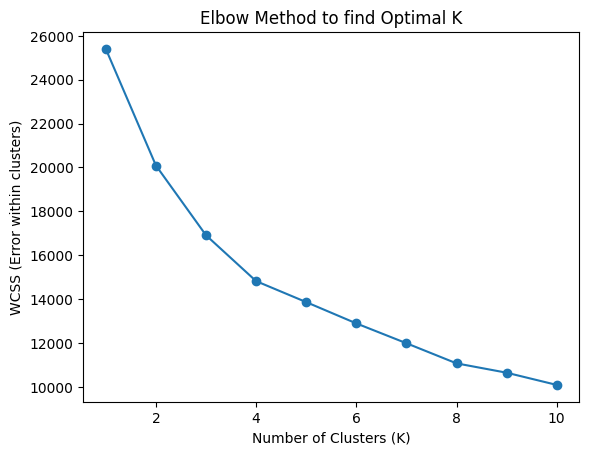

In [ ]:
#✅ Step 5 — Use the Elbow Method to find the best number of clusters (K)

wcss = []  # WCSS = Within-Cluster Sum of Squares (measures how tight the clusters are)

for i in range(1, 11):   # Try K = 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS for that K

# Plot the Elbow Graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to find Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Error within clusters)')
plt.show()

💡 What this does:

Tries different values of K (1 to 10).

Calculates WCSS (how spread out the points are inside each cluster).

Plots a graph:

X-axis → Number of clusters (K)

Y-axis → WCSS

We look for a point that looks like an elbow/bend in the graph → that’s the best K.

Eg. If the graph sharply drops until K=3 and then slows → K = 3 is best.

In [ ]:
#✅ Step 6 — Apply K-Means clustering using the best K value

kmeans = KMeans(n_clusters = 3, random_state = 42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

💡 What this means (super simple):
| Code                    | Meaning                                                                       |
| ----------------------- | ----------------------------------------------------------------------------- |
| `KMeans(n_clusters=3)`  | We are telling the model to form **3 groups/clusters**.                       |
| `fit_predict(X_scaled)` | Groups the data and returns which cluster each row belongs to.                |
| `df['Cluster']`         | Adds a new column named **Cluster** to the original dataset to store results. |


In [ ]:
#✅ Step 7 — View the clustering results

# Count how many rows are in each cluster
print(df['Cluster'].value_counts())

# Show first few rows with cluster labels
print("\nSample data with Cluster labels:\n")
print(df[['ORDERNUMBER', 'SALES', 'Cluster']].head())


Cluster
1    1183
2     907
0     733
Name: count, dtype: int64

Sample data with Cluster labels:

   ORDERNUMBER    SALES  Cluster
0        10107  2871.00        1
1        10121  2765.90        2
2        10134  3884.34        1
3        10145  3746.70        1
4        10159  5205.27        1


💡 What this shows:
| Output                                    | Meaning                                                              |
| ----------------------------------------- | -------------------------------------------------------------------- |
| `value_counts()`                          | Tells how many records belong to Cluster 0, 1, 2, etc.               |
| `df[['ORDERNUMBER', 'SALES', 'Cluster']]` | Shows ORDERNUMBER, its SALES value, and which cluster it belongs to. |
